In [1]:
function Conjugate(f, g, h, x0;
        ϵx=0.01, 
        ϵf=0.01,
        ϵg=0.01,
        debug=false)
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    steps=[]
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    push!(steps, xk)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return xk, steps
    end
    for i in 1:maxIterations
        xn = xk .+ δ
        push!(steps, xn)
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return xn, steps
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
end


Conjugate (generic function with 1 method)

In [2]:
function steepest_gradient(f,g,x0;
        ϵx=0.01,
        ϵf=0.01,
        ϵg=0.01,
        maxIterations=100,
        debug=false)
    xk=x0
    fk=f(xk...)
    ste=[]
    for i in 1: maxIterations
        d=-g(xk...)
        α=search_for_alpha(f,xk,fk,d,-d)
        δ=α*d
        xn=xk.+δ
        fn=f(xn...)
        push!(ste,xk)
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
             println("Convergence is reached after",i,"iterations.")
        return ste
        end
         if debug
             println("i=",i,"xk=",xk,"d=",d,"δ=",δ)
        end
    xk=xn
    fk=fn
    end
    println("WARN",maxIterations,"iterations have been exceeded")
end



steepest_gradient (generic function with 1 method)

In [3]:
function search_for_alpha(f,xk,fk,d,g;
        α0=100,
        ϵ=0.5,
        t=0.5,)
    α=α0
    φ0=d'*g
    while f((xk.+α*d)...)>fk+ϵ*α*φ0
       α=t*α
    end
    return α
end



search_for_alpha (generic function with 1 method)

In [4]:
function Newton(f,g,h,x0;
        ϵx=0.01,
        ϵf=0.01,
        ϵg=0.01,
        maxIterations=100,
        debug=false)
    xk=x0
    fk=f(xk...)
    Newton_steps=[]
    for i in 1: maxIterations
        gk= g(xk...)
        d=-inv(h(xk...))*gk
        α = search_for_alpha(f,xk,fk,d,-d)
        δ=α*d
        xn=xk.+δ
        fn=f(xn...)
        push!(Newton_steps,xn)
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
              println("Convergence is reached after",i,"iterations.")
        return Newton_steps
        end
         if debug
        println("i=",i,"xk=",xk,"xn",xn,"d=",d,"δ=",δ)
        println("fk=", fk, "\tfn=", f)
        end
        xk=xn
        fk=fn
    end
    println("WARN",maxIterations,"iterations have been exceeded")
end



Newton (generic function with 1 method)

In [6]:
norm(x)=sqrt(x'*x)

norm (generic function with 1 method)

In [27]:
(x,C)=Conjugate(
    (x1,x2)->x1^2+(32/2)*x2^2+3*x1*x2-x1-28*x2,
    (x1,x2)->[2*x1+3*x2-1,32*x2+3*x1-28],
    [2 3;3 32],
    [2.,2.],
    debug=false
)



Convergence is reached after 2 iterations.


([-0.945455, 0.963636], Any[[2.0, 2.0], [1.71798, 0.683889], [-0.945455, 0.963636]])

In [28]:
S=steepest_gradient(
     (x1,x2)->x1^2+(32/2)*x2^2+3*x1*x2-x1-28*x2,
    (x1,x2)->[2*x1+3*x2-1,32*x2+3*x1-28],
    maxIterations = 10000,
    [2.,2.],
    debug=false
)



Convergence is reached after47iterations.


47-element Array{Any,1}:
 [2.0, 2.0]           
 [1.78027, 0.974609]  
 [1.64638, 0.766398]  
 [1.19794, 0.623441]  
 [1.03846, 0.841022]  
 [0.862681, 0.741994] 
 [0.574464, 0.904898] 
 [0.434638, 0.774032] 
 [0.327638, 0.868127] 
 [0.106968, 0.793618] 
 [0.0290977, 0.905108]
 [-0.0575, 0.853802]  
 [-0.198751, 0.936892]
 ⋮                    
 [-0.923385, 0.964065]
 [-0.924494, 0.962114]
 [-0.928142, 0.960731]
 [-0.928774, 0.961733]
 [-0.934175, 0.963856]
 [-0.934742, 0.962858]
 [-0.936606, 0.962151]
 [-0.936929, 0.962663]
 [-0.939689, 0.963749]
 [-0.939979, 0.963239]
 [-0.940932, 0.962877]
 [-0.941097, 0.963139]

In [29]:
N=Newton(
(x1,x2)->x1^2+(32/2)*x2^2+3*x1*x2-x1-28*x2,
    (x1,x2)->[2*x1+3*x2-1,32*x2+3*x1-28],
    (x1,x2)->[2 3;3 32],
    [2.,2.],
    maxIterations = 10000,
    debug=false
)



Convergence is reached after12iterations.


12-element Array{Any,1}:
 [-2.60227, 0.380682] 
 [-0.0134943, 1.29155]
 [-1.46968, 0.779186] 
 [-0.650577, 1.06739] 
 [-1.11132, 0.905275] 
 [-0.852153, 0.996465]
 [-0.997937, 0.94517] 
 [-0.915933, 0.974023]
 [-0.96206, 0.957794] 
 [-0.936114, 0.966923]
 [-0.950709, 0.961788]
 [-0.942499, 0.964676]

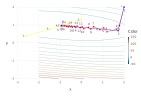

In [30]:
using Gadfly
S1=layer((x,y)->x^2+(32/2)*y^2+3*x*y-x-28*y, -2, 2, -2, 2);
S2=layer(
    x=[C[i][1] for i in 1:length(C)],
    y=[C[i][2] for i in 1:length(C)],
    label=[string(i) for i in 1:length(C)],
    Geom.point,
    Geom.line, 
    Geom.label,
    Theme(default_color=colorant"blue"));
S3=layer(
    x=[S[i][1] for i in 1:length(S)],
    y=[S[i][2] for i in 1:length(S)],
    label=[string(i) for i in 1:length(S)],
    Geom.point,
    Geom.line,
    Geom.label,
    Theme(default_color=colorant"red"));
S4=layer(
    x=[N[i][1] for i in 1:length(N)],
    y=[N[i][2] for i in 1:length(N)],
    label=[string(i) for i in 1:length(N)],
    Geom.point,
    Geom.line,
    Geom.label,
    Theme(default_color=colorant"yellow"));
plot(S1,S2,S3,S4)
